## Imports

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, recall_score , median_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, precision_score


### get_regression_metrics

In [152]:
def get_regression_metrics(y_predict_test, y_test, y_predict_train, y_train):
    """
    get_regression_metrics Hector
        y_predict_test: dataFrame, con los datos para ypredict
        Hola mundo
    """
    metrics_train = (r2_score(y_train, y_predict_train),
                     median_absolute_error(y_train, y_predict_train),
                     mean_absolute_percentage_error(y_train, y_predict_train) * 100,
                     mean_squared_error(y_train, y_predict_train),
                     root_mean_squared_error(y_train, y_predict_train))
    metrics_test = (r2_score(y_test, y_predict_test),
                    median_absolute_error(y_test, y_predict_test),
                    mean_absolute_percentage_error(y_test, y_predict_test) * 100,
                    mean_squared_error(y_test, y_predict_test),
                    root_mean_squared_error(y_test, y_predict_test))
    metrics_diff = list(map(lambda x: x[1] - x[0], zip(metrics_train, metrics_test)))
    return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff],
                        columns=['R2', 'MAE', 'MAPE', 'MSE', 'RMSE'],
                        index=['Train set', 'Test set', 'Difference'])


def get_classifier_metrics(y_predict_test, y_test, y_predict_train, y_train, average='micro'):
    metrics_train = (accuracy_score(y_train, y_predict_train),
                     f1_score(y_train, y_predict_train, average=average),
                     precision_score(y_train, y_predict_train, average=average),
                     recall_score(y_train, y_predict_train, average=average))
    metrics_test = (accuracy_score(y_test, y_predict_test),
                    f1_score(y_test, y_predict_test, average=average),
                    precision_score(y_test, y_predict_test, average=average),
                    recall_score(y_test, y_predict_test, average=average))
    return pd.DataFrame(data=[metrics_train, metrics_test],
                        columns=['Accuracy', 'F1 Score', 'Precision', 'Recall'],
                        index=['Train set', 'Test set'])

**Tutorial:** Construye un modelo de regresion lineal usando pandas y python
Comprender un dataset nuevo.

- Procesarlo aplicando un análisis exploratorio (EDA).
- Modelar los datos utilizando la regresión lineal regularizada.
- Analizar los resultados y optimizar el modelo de regresion lineal.

🌱 Cómo iniciar este proyecto


1. Crea un nuevo repositorio basado en el proyecto de Machine Learning haciendo clic aquí.
2. Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.
3. Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.

🚛 Cómo entregar el modelo de regresión lineal
Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.

📝 Instrucciones para construir el modelo de regresion lineal
Datos socio demográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)
Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

Para ello, es necesario que establezcas una variable objetivo (relacionada con la salud) para llevar a cabo el análisis.

Paso 1: Carga del conjunto de datos a tu modelo
El conjunto de datos se puede encontrar en esta carpeta de proyecto bajo el nombre demographic_health_data.csv. Puedes cargarlo en el código directamente desde el siguiente enlace:

https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv
O descargarlo y añadirlo a mano en tu repositorio. En este conjunto de datos encontrarás una gran cantidad de variables, que encontrarás definidas aquí.

Paso 2: Realiza un EDA completo
Este segundo paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en lecciones anteriores.

Paso 3: Construye un modelo de regresión
Comienza a resolver el problema implementando un modelo de regresión lineal y analiza los resultados. A continuación, utilizando los mismos datos y los atributos por defecto, construye un modelo Lasso y compara los resultados con la regresión lineal base.

Analiza cómo evoluciona el 
R
2
R 
2
 
 cuando el hiperparámetro del modelo Lasso cambia (puedes por ejemplo empezar a probar desde el valor 0.0 e ir aumentándolo hasta un valor de 20). Dibuja estos valores en un diagrama de líneas.

Paso 4: Optimiza el modelo de regresion anterior
Después de entrenar el modelo Lasso, si los resultados no son satisfactorios, optimízalo empleando alguna de las técnicas vistas anteriormente.

Nota: También incorporamos muestras de solución en ./solution.ipynb que te sugerimos honestamente que solo uses si estás atascado por más de 30 minutos o si ya has terminado y quieres compararlo con tu enfoque.

## EDA

### PASO 1: Planteamos nuestro problema o nuestro target a investigar

#### Cuál es la prevalencia de diabetes en el conjunto de datos?

### PASO 2: Recopilacion de datos

In [ ]:
df = pd.read_csv("/workspaces/machine-learning-elius123ef/data/raw/demographic_health_data.csv.csv")
df.head()

### Paso 3: Análisis Descriptivo

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.nunique()

In [ ]:
df.dtypes

In [ ]:
# Variables numéricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numericas

In [ ]:
# Variables categóricas
categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
categoricas

### Paso 4: Limpieza de Datos

#### Buscamos duplicados:

In [ ]:
df.duplicated().sum()

#### Buscamos nulos:

In [ ]:
df.isnull().sum()

### Paso 5: Análisis de Variables

Como trabajaremos con una enfermedad en especifico en este caso la diabete, procederemos a eliminar las demas variantes que no nos interesa y asi continuar con nuestro análisis.

In [ ]:
columnas_utiles = [
    'COUNTY_NAME', 'STATE_NAME', 'Urban_rural_code', 'TOT_POP',
    'diabetes_prevalence', 'diabetes_number', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI',
    "0-9", "19-Oct", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"
    ]

df_diabetes = df[columnas_utiles]
df = df[columnas_utiles]

#### Análisis de Variables Univariante

##### Análisis de Variables Univariante Categóricas:

1. COUNTY_NAME
2. STATE_NAME
3. Urban_rural_code

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(9, 8))

sns.histplot(ax=axis[0, 0], data=df, x="COUNTY_NAME", color='skyblue')
sns.histplot(ax=axis[0, 1], data=df, x="STATE_NAME", color='skyblue')
sns.histplot(ax=axis[1, 0], data=df, x="Urban_rural_code", color='skyblue')
fig.delaxes(axis[1,1])
plt.tight_layout()
plt.show()

CONCLUSION

- Desbalance geográfico: Algunos condados y estados tienen una representación mucho mayor que otros, lo que sugiere que el dataset no está uniformemente distribuido. Esto puede influir en cualquier análisis regional, especialmente si se comparan tasas de prevalencia como la diabetes.

- Tendencia rural dominante: El gráfico de Urban_rural_code muestra que los registros aumentan progresivamente hacia códigos más rurales (especialmente el código 6). Esto indica que el dataset tiene una mayor proporción de datos provenientes de zonas rurales, lo cual es relevante si se quiere estudiar cómo las condiciones de salud varían entre entornos urbanos y rurales.

- Implicaciones para el análisis: Este desbalance sugiere que cualquier análisis de salud (como diabetes, obesidad o enfermedades crónicas) debe considerar la estratificación por región y entorno para evitar sesgos. También puede ser útil normalizar por población o aplicar técnicas de muestreo para equilibrar los grupos.


#### Análisis de Variables Univariante Numéricas



In [ ]:
fig, axis = plt.subplots(3, 2, figsize=(8, 5))

sns.histplot(ax=axis[0, 0], data=df, x="Urban_rural_code", color='skyblue').set(xlabel=None,ylabel="Urban_rural_code")
sns.boxplot(ax=axis[0, 1], data=df, x="Urban_rural_code", color='skyblue').set(xlabel=None,)
sns.histplot(ax=axis[1, 0], data=df, x="diabetes_prevalence", color='skyblue').set(xlabel=None, ylabel="diabetes_prevalence")
sns.boxplot(ax=axis[1, 1], data=df, x="diabetes_prevalence", color='skyblue').set(xlabel=None,)
sns.histplot(ax=axis[2, 0], data=df, x="TOT_POP", color='skyblue').set(xlabel=None, ylabel="TOT_POP")
sns.boxplot(ax=axis[2, 1], data=df, x="TOT_POP", color='skyblue').set(xlabel=None,)
plt.grid(True)
plt.tight_layout()
plt.show()


**Conclusion**

- Es recomendable normalizar por población al estudiar indicadores como diabetes.
- La representación rural puede influir en los patrones de salud observados.
- La dispersión en diabetes_prevalence sugiere que vale la pena explorar correlaciones con otras variables como edad, etnia o acceso a servicios.


In [ ]:
fig, axis = plt.subplots(3, 2, figsize=(8, 5))

sns.histplot(ax=axis[0, 0], data=df, x="diabetes_number", color='skyblue').set(xlabel=None,ylabel="diabetes_number")
sns.boxplot(ax=axis[0, 1], data=df, x="diabetes_number", color='skyblue').set(xlabel=None,)
sns.histplot(ax=axis[1, 0], data=df, x="diabetes_Lower 95% CI", color='skyblue').set(xlabel=None, ylabel="diabetes_Lower 95% CI")
sns.boxplot(ax=axis[1, 1], data=df, x="diabetes_Lower 95% CI", color='skyblue').set(xlabel=None,)
sns.histplot(ax=axis[2, 0], data=df, x="diabetes_Upper 95% CI", color='skyblue').set(xlabel=None, ylabel="diabetes_Upper 95% CI")
sns.boxplot(ax=axis[2, 1], data=df, x="diabetes_Upper 95% CI", color='skyblue').set(xlabel=None,)
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusion**

- La variable diabetes_number debe analizarse normalizada por población (TOT_POP) para evitar sesgos por tamaño de condado.
- Las estimaciones por intervalo (Lower y Upper CI) permiten evaluar la precisión estadística y pueden usarse para filtrar condados con alta incertidumbre.
- El análisis geográfico puede beneficiarse de mapas coropléticos o agrupaciones por quintiles para visualizar la distribución de la diabetes.


#### Análisis de Variables Multivariante

##### Análisis categórico-categórico

**diabetes_prevalence ( COUNTY_NAME, STATE_NAME, Urban_rural_code)**

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x='COUNTY_NAME', y='diabetes_prevalence', data=df, ax=axes[0], color='skyblue')
sns.boxplot(x='STATE_NAME', y='diabetes_prevalence', data=df, ax=axes[1], color='skyblue')
sns.boxplot(x='Urban_rural_code', y='diabetes_prevalence', data=df, ax=axes[2], color='skyblue')
plt.tight_layout()
plt.show()


#### Análisis de correlaciones

In [ ]:
df['COUNTY_NAME'] = pd.factorize(df['COUNTY_NAME'])[0]
df['STATE_NAME'] = pd.factorize(df['STATE_NAME'])[0]


In [ ]:
corr = df[["STATE_NAME", "COUNTY_NAME", "Urban_rural_code", "TOT_POP", "diabetes_prevalence", "diabetes_number", "diabetes_Lower 95% CI",
           "diabetes_Upper 95% CI", "0-9",	"19-Oct", "20-29",	"30-39", "40-49", "50-59", "60-69", "70-79", "80+",]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

##### Conclusion

 Diabetes y edad

- Las variables de edad avanzada (especialmente 60-69, 70-79, 80+) tienen correlaciones positivas moderadas con diabetes_prevalence, lo que sugiere que la diabetes es más común en poblaciones mayores.
- Las edades jóvenes (10-19, 20-29) tienen correlaciones negativas o débiles, lo que refuerza esta tendencia.

 Diabetes y población total (TOT_POP)

- La correlación con diabetes_number es positiva y fuerte, lo cual es esperable: más población implica más casos absolutos.
- Sin embargo, la correlación con diabetes_prevalence es más débil, lo que indica que la tasa no depende directamente del tamaño poblacional.

 Urban_rural_code
 
- Hay una correlación positiva con diabetes_prevalence, lo que sugiere que la diabetes es más prevalente en zonas rurales (si los códigos más altos representan ruralidad).
- Esto puede reflejar diferencias en acceso a salud, estilo de vida o factores socioeconómicos.

 Intervalos de confianza (Lower y Upper 95% CI)

- Están fuertemente correlacionados con diabetes_prevalence, lo que indica que las estimaciones son consistentes y bien calibradas.



### Paso 6: Ingeniería de características

#### Análisis de outliers

**Outliers: Análisis descriptivo**

In [ ]:
df.describe().T

**Outliers: Visualización y eliminacion**

In [138]:
outliers_dict = {}

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = len(outliers)
outliers_dict



{'COUNTY_NAME': 0,
 'STATE_NAME': 0,
 'Urban_rural_code': 0,
 'TOT_POP': 432,
 'diabetes_prevalence': 33,
 'diabetes_number': 388,
 'diabetes_Lower 95% CI': 39,
 'diabetes_Upper 95% CI': 29,
 '0-9': 429,
 '19-Oct': 431,
 '20-29': 438,
 '30-39': 431,
 '40-49': 433,
 '50-59': 423,
 '60-69': 402,
 '70-79': 373,
 '80+': 394}

In [134]:
def tratar_outliers_iqr(df, metodo='winsorize', visualizar=False):
    """
    Trata outliers en columnas numéricas usando el criterio IQR.
    
    - metodo: 'winsorize' (recorta) o 'eliminar' (filtra filas)
    - visualizar: si True, muestra boxplots antes y después
    """
    df_out = df.copy()
    numericas = df_out.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numericas:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        
        
        if metodo == 'winsorize':
            df_out[col] = df_out[col].clip(lower, upper)
        elif metodo == 'eliminar':
            df_out = df_out[(df_out[col] >= lower) & (df_out[col] <= upper)]
        
        if visualizar:
            sns.boxplot(x=df_out[col], color='skyblue')
            plt.title('Outliers')
            plt.show()
    
    return df_out


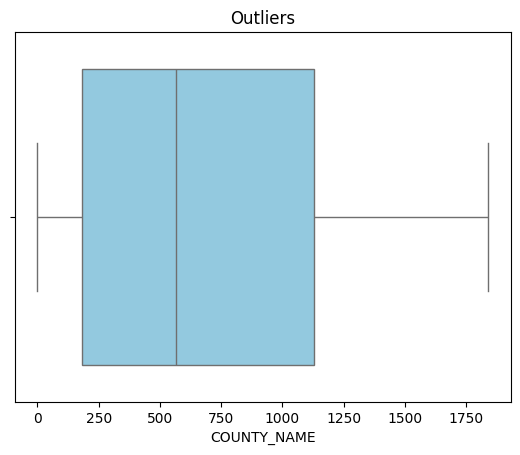

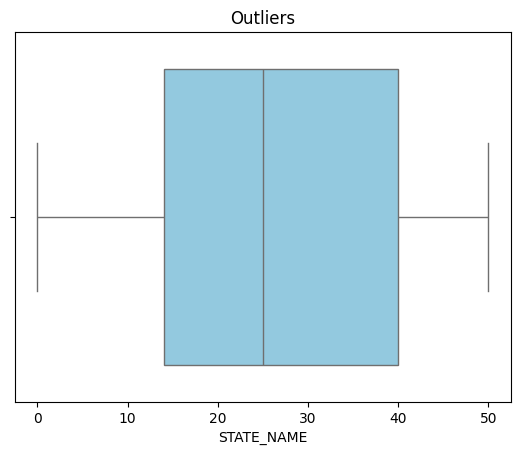

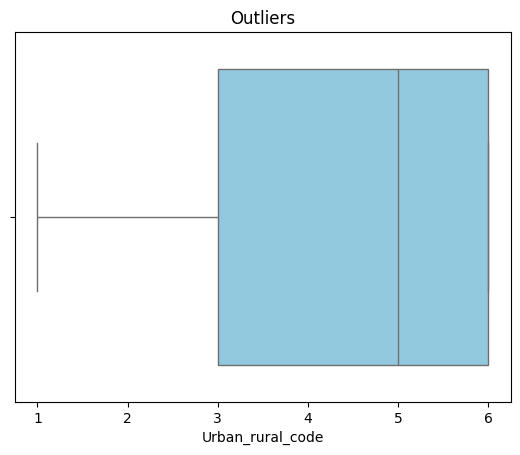

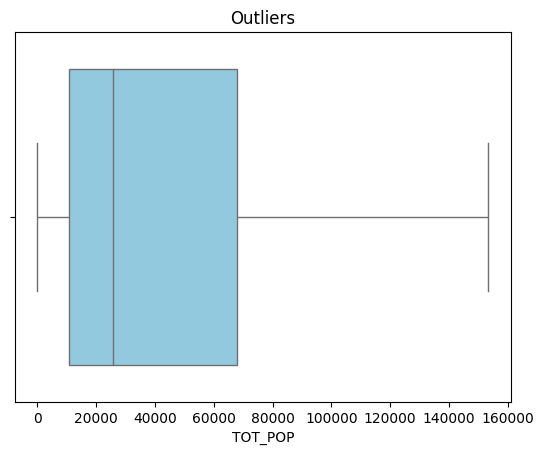

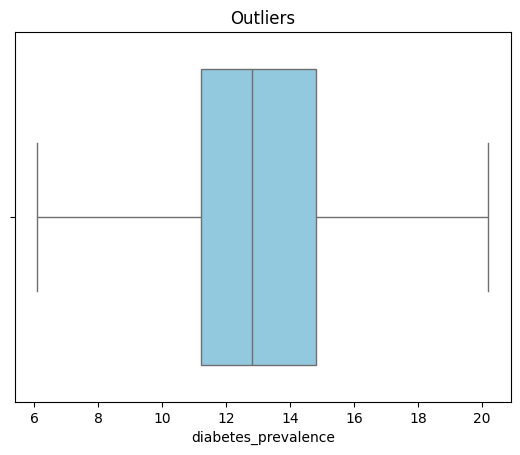

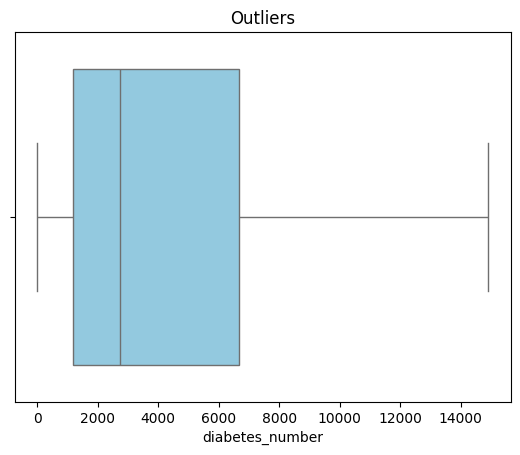

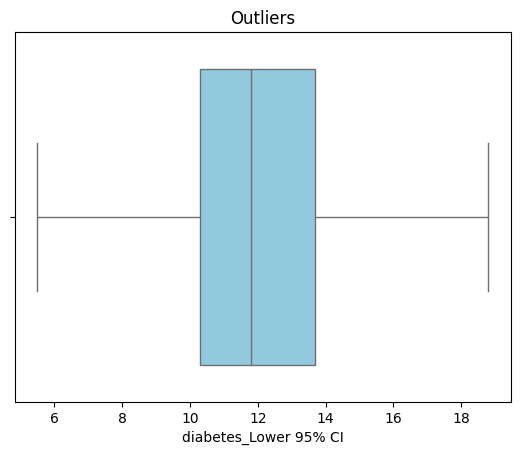

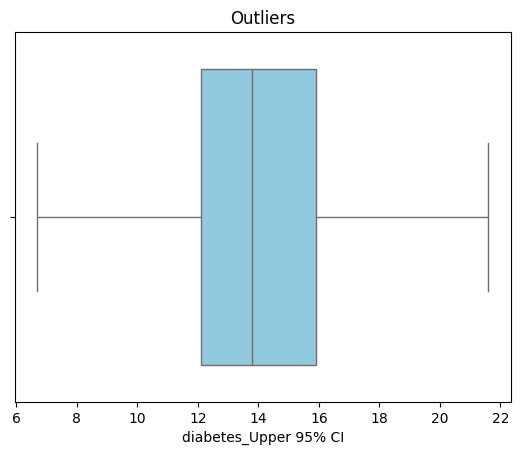

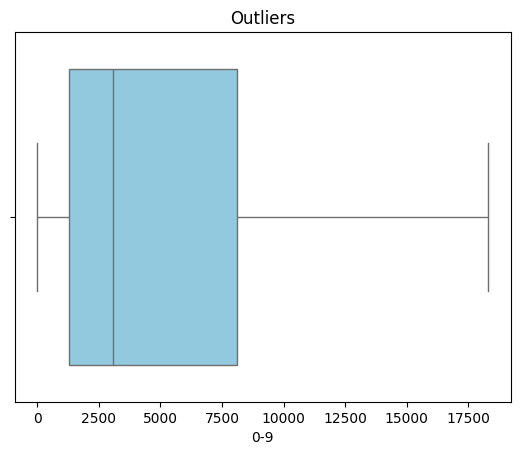

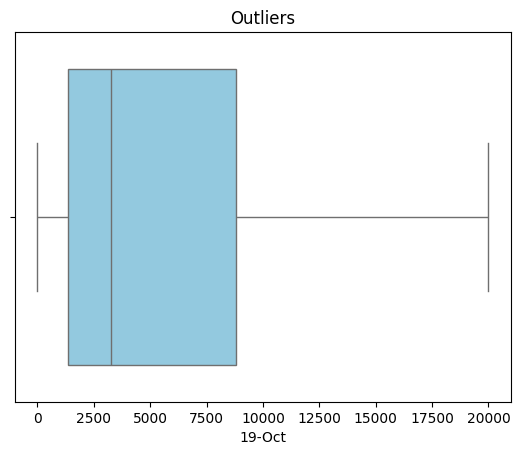

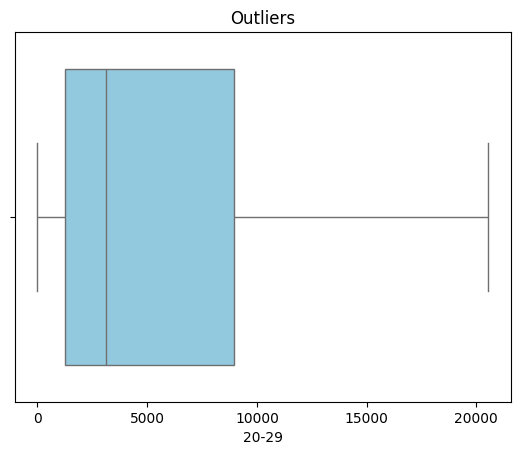

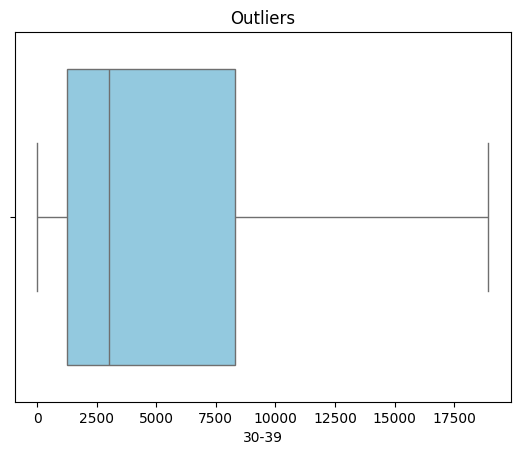

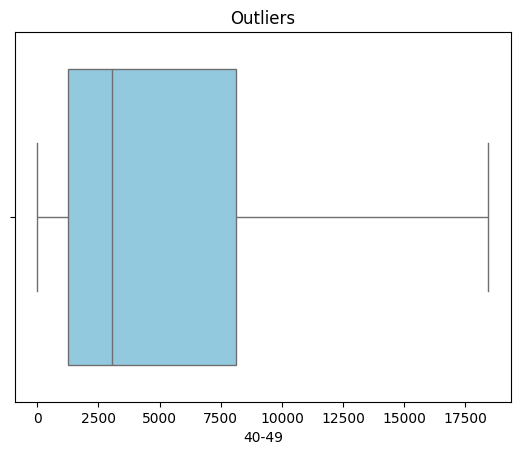

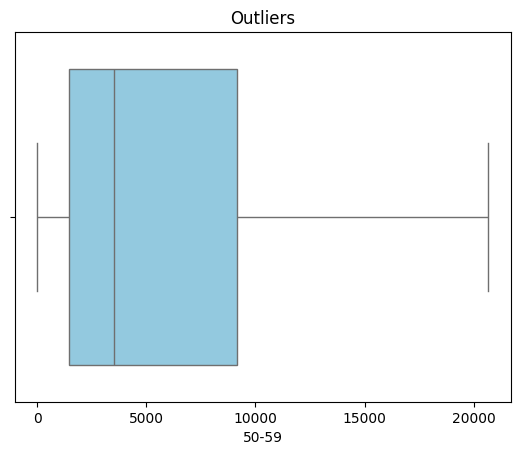

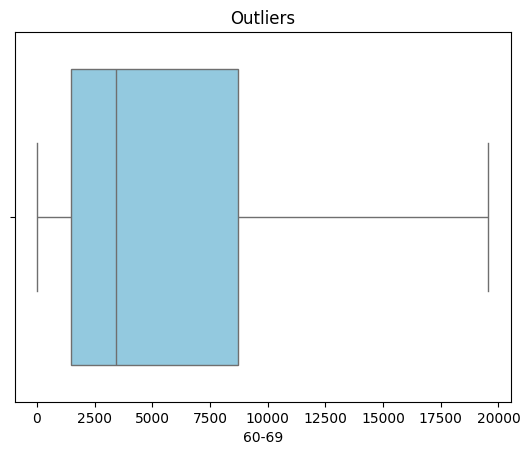

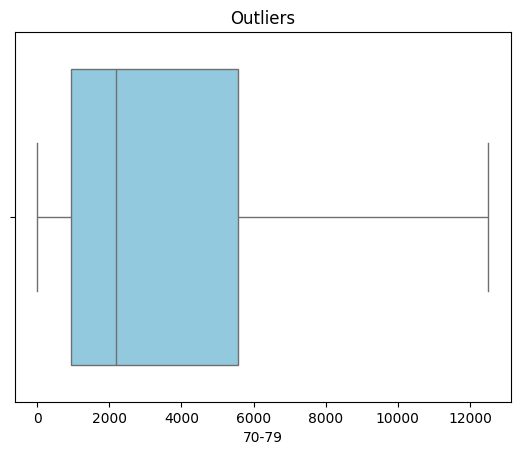

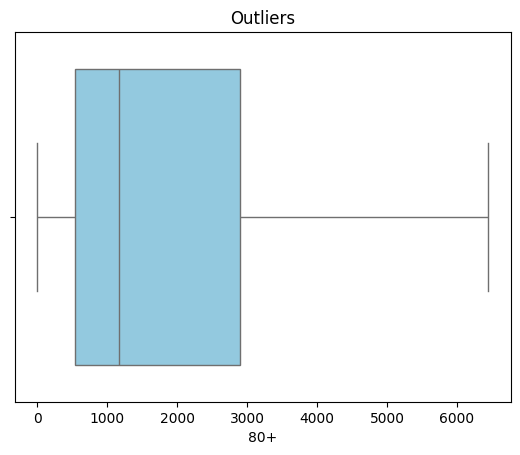

In [135]:
df_tratado = tratar_outliers_iqr(df, metodo='winsorize', visualizar=True)


### Paso 7: Split

In [139]:
df

,COUNTY_NAME,STATE_NAME,Urban_rural_code,TOT_POP,diabetes_prevalence,diabetes_number,diabetes_Lower 95% CI,diabetes_Upper 95% CI,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+
0,0,0,3,55601,12.9,5462,11.9,13.8,6787,7637,6878,7089,7582,7738,5826,4050,2014
1,1,0,4,218022,12.0,20520,11.0,13.1,24757,26913,23579,25213,27338,29986,29932,20936,9368
2,2,0,6,24881,19.7,3870,18.6,20.6,2732,2960,3268,3201,3074,3278,3076,2244,1048
3,3,0,2,22400,14.1,2511,13.2,14.9,2456,2596,3029,3113,3038,3115,2545,1723,785
4,4,0,2,57840,13.5,6017,12.6,14.5,7095,7570,6742,6884,7474,7844,6965,4931,2335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,1837,50,5,43051,8.9,2834,8.3,9.6,6104,6326,5359,6577,5334,5261,4943,2198,949
3136,481,50,5,23081,7.2,1360,6.5,8.0,2384,2185,2967,4093,3423,2928,2875,1569,657
3137,1838,50,5,20299,10.4,1500,9.5,11.2,3121,3205,2153,2702,2390,2434,2554,1233,507
3138,1839,50,6,7885,11.3,686,10.3,12.1,858,1113,715,903,900,1085,1118,741,452


### Split 80/20

In [141]:
X = df.drop(["diabetes_prevalence"], axis=1)
y = df["diabetes_prevalence"]

X = df.drop(["diabetes_prevalence"], axis=1)
y = df["diabetes_prevalence"]

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Encoding y scaling

In [145]:
numericas = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = X.select_dtypes(include=['object', 'category']).columns.tolist()


preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
])


X_train_proc = preprocesador.fit_transform(X_train)
X_test_proc = preprocesador.transform(X_test)

#### Entrenar y evaluar

In [146]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [147]:
lr_y_pred_train = lr_model.predict(X_train)
lr_y_pred_test = lr_model.predict(X_test)

In [153]:
get_regression_metrics(lr_y_pred_test, y_test, lr_y_pred_train, y_train)

,R2,MAE,MAPE,MSE,RMSE
Train set,0.999734,0.042652,0.261948,0.001930,0.043928
Test set,0.999738,0.042576,0.273038,0.002103,0.045862
Difference,0.000004,-0.000077,0.011090,0.000174,0.001934


#### Regularización Lasso

In [154]:
lasso_model = Lasso(alpha=0.5, max_iter=5000, random_state=18)  # modelo
lasso_model.fit(X_train, y_train)  # entrenamiento

lasso_y_pred_test = lasso_model.predict(X_test)  # Predicción en test
lasso_y_pred_train = lasso_model.predict(X_train)  # Predicción en train
get_regression_metrics(lasso_y_pred_test, y_test, lasso_y_pred_train, y_train)  # Métricas

/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.210e+02, tolerance: 1.823e+00
  model = cd_fast.enet_coordinate_descent(


,R2,MAE,MAPE,MSE,RMSE
Train set,0.992357,0.156246,1.449703,0.055480,0.235542
Test set,0.991803,0.165646,1.541192,0.065926,0.256760
Difference,-0.000553,0.009400,0.091489,0.010446,0.021218


#### Regularización Ridge

In [155]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_y_pred_train = ridge.predict(X_train)
ridge_y_pred_test = ridge.predict(X_test)
ridge_metrics = get_regression_metrics(ridge_y_pred_test, y_test, ridge_y_pred_train, y_train)
ridge_metrics

,R2,MAE,MAPE,MSE,RMSE
Train set,0.999734,0.042627,0.261912,0.001930,0.043928
Test set,0.999738,0.042565,0.273046,0.002104,0.045872
Difference,0.000004,-0.000063,0.011134,0.000175,0.001944


#### LassoCV

In [156]:
lasso_cv_model = (LassoCV(alphas=np.logspace(-6, 6, 10),
                         cv=5,
                         random_state=18,
                         n_jobs=-1).fit(X_train, y_train))

lasso_cv_y_pred_test = lasso_cv_model.predict(X_test)  # Predicción en test
lasso_cv_y_pred_train = lasso_cv_model.predict(X_train)  # Predicción en train
get_regression_metrics(lasso_cv_y_pred_test, y_test, lasso_cv_y_pred_train, y_train)  # Métricas

/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.911e+01, tolerance: 1.452e+00
  model = cd_fast.enet_coordinate_descent_gram(
/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.994e+02, tolerance: 1.469e+00
  model = cd_fast.enet_coordinate_descent_gram(
/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

,R2,MAE,MAPE,MSE,RMSE
Train set,0.999734,0.042915,0.261590,0.001931,0.043946
Test set,0.999739,0.042883,0.272246,0.002100,0.045824
Difference,0.000005,-0.000032,0.010656,0.000169,0.001878


#### RidgeCV

In [157]:
ridge_cv_model = RidgeCV(alphas=np.logspace(-6, 6, 10),
                         cv=5).fit(X_train, y_train)

ridge_cv_y_pred_test = ridge_cv_model.predict(X_test)  # Predicción en test
ridge_cv_y_pred_train = ridge_cv_model.predict(X_train)  # Predicción en train
get_regression_metrics(ridge_cv_y_pred_test, y_test, ridge_cv_y_pred_train, y_train)

/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.24169e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.1197e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.33983e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.16891e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/sc

,R2,MAE,MAPE,MSE,RMSE
Train set,0.999734,0.042646,0.261940,0.001930,0.043928
Test set,0.999738,0.042573,0.273040,0.002104,0.045864
Difference,0.000004,-0.000073,0.011099,0.000174,0.001936


#### ElasticNet

In [158]:
elasticnet_model = ElasticNet(alpha=0.0001,
                              max_iter=5000,
                              random_state=18).fit(X_train, y_train)

elasticnet_y_pred_test = elasticnet_model.predict(X_test)
elasticnet_y_pred_train = elasticnet_model.predict(X_train)
get_regression_metrics(elasticnet_y_pred_test, y_test, elasticnet_y_pred_train, y_train)

/workspaces/machine-learning-elius123ef/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e+00, tolerance: 1.823e+00
  model = cd_fast.enet_coordinate_descent(


,R2,MAE,MAPE,MSE,RMSE
Train set,0.999734,0.042689,0.261852,0.001930,0.043928
Test set,0.999739,0.042686,0.272930,0.002103,0.045858
Difference,0.000004,-0.000004,0.011078,0.000173,0.001930


#### Conclusión general

En rendimiento general los modelos muestran un rendimiento excepcional, con valores de R² superiores al 0.99 tanto en entrenamiento como en prueba. Esto indica que el modelo explica casi toda la variabilidad de la variable objetivo. Además:
- MAE y RMSE extremadamente bajos → errores absolutos y cuadráticos mínimos.
- MAPE < 1.6% en todos los casos → altísima precisión relativa.
- Diferencias mínimas entre train y test → sin señales de overfitting
 
Comparación entre modelos:

- Ridge, RidgeCV, LassoCV y ElasticNet tienen un rendimiento prácticamente idéntico. Esto sugiere que:
- Las relaciones son altamente lineales y estables.
- La regularización no está penalizando demasiado ni dejando pasar ruido.
- Lasso (sin CV) tiene un rendimiento ligeramente inferior, pero aún excelente. Esto puede deberse a una selección de alpha menos óptima.
